<aside>
💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

In [20]:
def reconstruct_perm(s):
    perm = []
    n = len(s)
    low, high = 0, n
    
    for ch in s:
        if ch == 'I':
            perm.append(low)
            low += 1
        elif ch == 'D':
            perm.append(high)
            high -= 1
    
    perm.append(low)  # or perm.append(high)
    return perm


In [21]:
s = "IDID"
result = reconstruct_perm(s)
print(result)


[0, 4, 1, 3, 2]


Initialize an empty list called "perm" to store the reconstructed permutation.
Initialize a variable "n" to the length of the string "s".
Initialize two variables: "low" with a value of 0 and "high" with a value of "n".
Iterate through each character "ch" in the string "s":
If "ch" is 'I', append the value of "low" to "perm" and increment "low" by 1.
If "ch" is 'D', append the value of "high" to "perm" and decrement "high" by 1.
After the loop ends, append the final value of either "low" or "high" to "perm".
Return the reconstructed permutation "perm".


💡 **Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity
**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

In [11]:
def search_matrix(matrix, target):
    m = len(matrix)
    n = len(matrix[0])
    left, right = 0, m * n - 1
    
    while left <= right:
        mid = (left + right) // 2
        row = mid // n
        col = mid % n
        
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1
    
    return False


In [12]:
matrix = [[1, 3, 5, 7], [10, 11, 16, 20], [23, 30, 34, 60]]
target = 3

result = search_matrix(matrix, target)
print(result)


True


Initialize two variables, "m" and "n," to the number of rows and columns in the matrix, respectively.
Set two pointers, "left" and "right," to the first and last indices of the flattened matrix, which is from 0 to m * n - 1.
While "left" is less than or equal to "right," perform the following steps:
a. Calculate the middle index as "mid" using the formula mid = (left + right) // 2.
b. Convert the middle index back into row and column indices to access the corresponding element in the matrix:
row = mid // n
col = mid % n
c. If the target is equal to the element at the mid index in the matrix, return True.
d. If the target is less than the element at the mid index, update "right" to mid - 1.
e. If the target is greater than the element at the mid index, update "left" to mid + 1.
If the while loop completes without finding the target, return False.

<aside>
💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

![Screenshot 2023-05-29 005352.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/5565e778-ac57-4ced-85a2-ccb13268bdf6/Screenshot_2023-05-29_005352.png)

[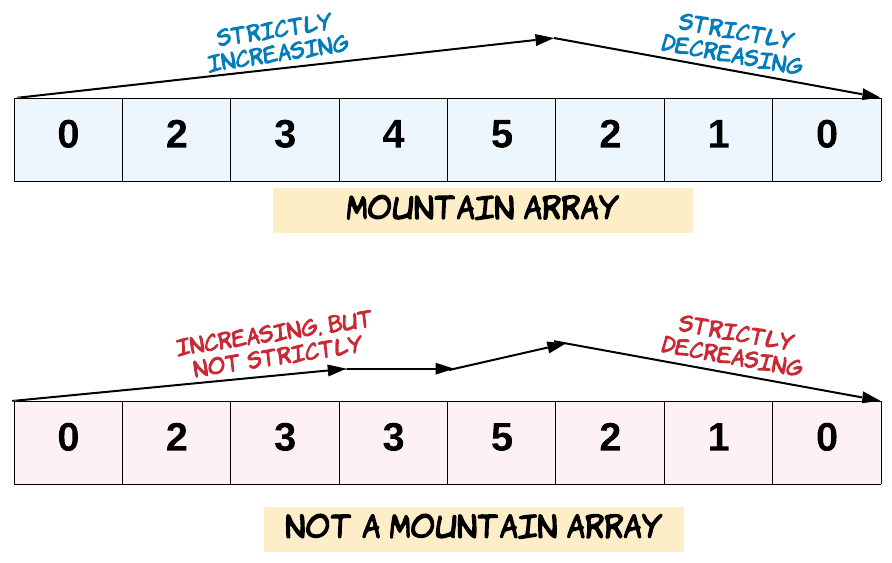](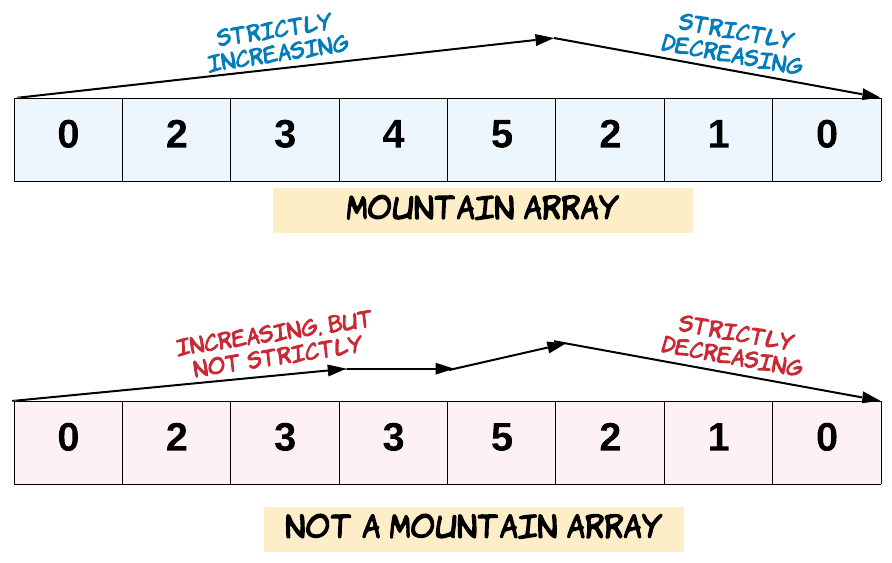)

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false

</aside>

In [13]:
def validMountainArray(arr):
    n = len(arr)
    
    if n < 3:
        return False
    
    i = 0
    
    # Check for increasing sequence
    while i < n - 1 and arr[i] < arr[i + 1]:
        i += 1
    
    # If the peak is at the start or end, it's not a valid mountain
    if i == 0 or i == n - 1:
        return False
    
    # Check for decreasing sequence
    while i < n - 1 and arr[i] > arr[i + 1]:
        i += 1
    
    # If the pointer reached the end of the array, it's a valid mountain
    return i == n - 1

In [14]:
arr = [2, 1]
print(validMountainArray(arr))  # Output: False

False


The length of the array should be at least 3.
There should exist an index i (0 < i < arr.length - 1) where the elements before i are strictly increasing, and the elements after i are strictly decreasing.

<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>

In [26]:
def MaxLength(nums):
    max_length = 0
    count = 0
    sum_indices = {0: -1}

    for i in range(len(nums)):
        count += 1 if nums[i] == 1 else -1

        if count in sum_indices:
            length = i - sum_indices[count]
            max_length = max(max_length, length)
        else:
            sum_indices[count] = i

    return max_length


In [27]:
nums = [0, 1]
result = MaxLength(nums)
print(result)


2


<aside>
💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

</aside>

In [18]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort(reverse=True)

    min_product_sum = sum(nums1[i] * nums2[i] for i in range(len(nums1)))
    return min_product_sum


In [19]:
nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
result = minProductSum(nums1, nums2)
print(result)


40


<aside>
💡 **Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

</aside>

In [28]:
def OriginalArray(changed):
    if len(changed) % 2 != 0:
        return []  # The changed array length must be even
    
    original = []
    counts = {}
    
    for num in changed:
        if num not in counts:
            counts[num] = 0
        counts[num] += 1
    
    for num in sorted(changed):
        if counts.get(num, 0) == 0:
            continue
        
        if counts.get(num * 2, 0) == 0:
            return []  # Doubled value not found in changed array
        
        original.append(num)
        counts[num] -= 1
        counts[num * 2] -= 1
    
    if sum(counts.values()) != 0:
        return []  # Some values in changed were not paired
    
    return original


In [29]:
changed = [1, 3, 4, 2, 6, 8]
print(OriginalArray(changed))

[1, 3, 4]


To solve this problem, we can iterate over the elements in the changed array and keep track of the values encountered. For each element, we check if it can be obtained by doubling a value in the original array. If it can, we remove the corresponding element from the original array. Finally, if the original array is empty, we return the values encountered.

<aside>
💡 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

</aside>

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [5]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    
    # Define the boundaries
    top = 0
    bottom = n - 1
    left = 0
    right = n - 1
    
    num = 1  # The current number to be placed in the matrix
    
    while num <= n * n:
        # Traverse from left to right
        for i in range(left, right + 1):
            matrix[top][i] = num
            num += 1
        top += 1
        
        # Traverse from top to bottom
        for i in range(top, bottom + 1):
            matrix[i][right] = num
            num += 1
        right -= 1
        
        # Traverse from right to left
        for i in range(right, left - 1, -1):
            matrix[bottom][i] = num
            num += 1
        bottom -= 1
        
        # Traverse from bottom to top
        for i in range(bottom, top - 1, -1):
            matrix[i][left] = num
            num += 1
        left += 1
    
    return matrix

In [6]:
n = 3
print(generateMatrix(n))

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


To generate an n x n matrix filled with elements in a spiral order, we can use a iterative approach. We start with an empty matrix filled with zeros and simulate the spiral traversal pattern by updating the values in the matrix.

<aside>
💡 **Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

![Screenshot 2023-05-29 005557.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/df57e793-12bf-4104-a17b-4e6a88dc7955/Screenshot_2023-05-29_005557.png)

[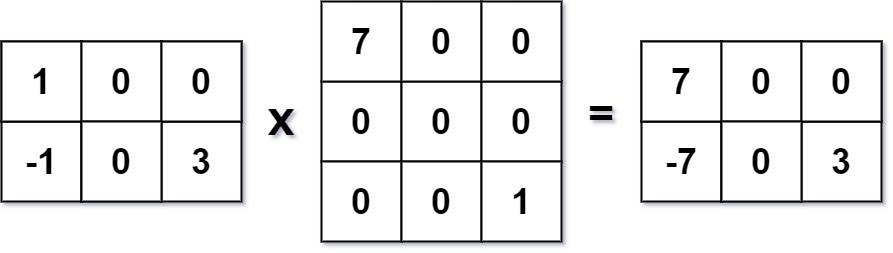](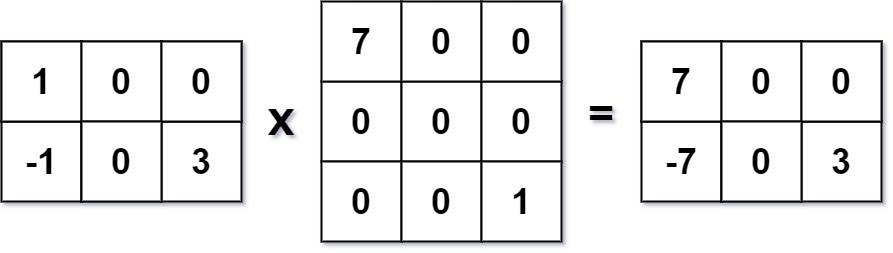)

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

</aside>

In [7]:
def multiply(mat1, mat2):
    m, k = len(mat1), len(mat1[0])
    k, n = len(mat2), len(mat2[0])
    
    result = [[0] * n for _ in range(m)]
    
    # Perform matrix multiplication
    for i in range(m):
        for j in range(n):
            for p in range(k):
                result[i][j] += mat1[i][p] * mat2[p][j]
    
    return result

In [8]:
mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]

print(multiply(mat1, mat2))

[[7, 0, 0], [-7, 0, 3]]


To multiply two sparse matrices mat1 and mat2, we can use the standard matrix multiplication algorithm. Since the matrices are sparse, meaning they contain a significant number of zero elements, we can optimize the multiplication process to avoid unnecessary multiplications.